In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Load Data

## Dataset

https://www.kaggle.com/datasets/msambare/fer2013

Emotion label
- 0: angry
- 1: disgust
- 2: fear
- 3: happy
- 4: sad
- 5: surprise
- 6: neutral

In [6]:
# Data folders
train_dir = '../data/external/fer2013/train'
test_dir = '../data/external/fer2013/test'

# Emotion labels
emotion_labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
emotions = {val: key for key, val in emotion_labels.items()} 

In [7]:
# Train dataset
image_data = []
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
            file = os.path.join(dirname, filename)
            image = mpimg.imread(file).flatten()
            pixels = ' '.join(str(x) for x in image)
            scale = ' '.join(str(x/255.0) for x in image)
            image_data.append([filename, 'train', cat, emotions[cat], pixels, scale])

In [8]:
# Test dataset
for dirname, dirs, filenames in os.walk(test_dir, topdown=True):
    cat = dirname.replace(test_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
            file = os.path.join(dirname, filename)
            image = mpimg.imread(file).flatten()
            pixels = ' '.join(str(x) for x in image)
            scale = ' '.join(str(x/255.0) for x in image)
            image_data.append([filename, 'test', cat, emotions[cat], pixels, scale])

In [9]:
df = pd.DataFrame(image_data, columns = ['file', 'usage', 'emotion_label', 'emotion', 'pixels', 'scaled_pixels'])
df.head()

,file,usage,emotion_label,emotion,pixels,scaled_pixels
0,Training_50449107.jpg,train,happy,3,108 83 63 65 89 111 121 121 125 111 103 105 11...,0.4235294117647059 0.3254901960784314 0.247058...
1,Training_70433018.jpg,train,happy,3,137 142 159 162 158 134 113 167 174 177 164 12...,0.5372549019607843 0.5568627450980392 0.623529...
2,Training_85610005.jpg,train,happy,3,111 148 155 167 181 191 194 193 195 199 203 20...,0.43529411764705883 0.5803921568627451 0.60784...
3,Training_4460748.jpg,train,happy,3,151 156 121 100 80 116 151 169 183 185 192 190...,0.592156862745098 0.611764705882353 0.47450980...
4,Training_6312930.jpg,train,happy,3,248 187 149 130 97 140 139 117 197 251 231 255...,0.9725490196078431 0.7333333333333333 0.584313...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file           35887 non-null  object
 1   usage          35887 non-null  object
 2   emotion_label  35887 non-null  object
 3   emotion        35887 non-null  int64 
 4   pixels         35887 non-null  object
 5   scaled_pixels  35887 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


# Data Cleaning

There is no missing data, no outlier, all pixel data are within the range, 0 to 255. 

## Delete Black or White images

In [11]:
del_idx = []
for index, row in df.iterrows():
    arr = np.fromstring(row.pixels, dtype=int, sep=' ')
    image_sum = np.sum(arr)
    if (image_sum == 0) | (image_sum == (255 * 2304)):
        del_idx.append(index)

In [12]:
print(len(del_idx))
df.loc[del_idx]

12


,file,usage,emotion_label,emotion,pixels,scaled_pixels
2801,Training_87607167.jpg,train,happy,3,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
10605,Training_48621797.jpg,train,sad,4,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
19240,Training_48403842.jpg,train,surprise,5,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
21055,Training_89335926.jpg,train,neutral,6,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
24441,Training_32571770.jpg,train,angry,0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
24735,Training_96772745.jpg,train,angry,0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
24754,Training_52563817.jpg,train,angry,0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
25168,Training_10131352.jpg,train,angry,0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
25465,Training_28756096.jpg,train,angry,0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
27134,Training_99531165.jpg,train,angry,0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....


In [13]:
df.drop(del_idx, inplace=True)

# EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35875 entries, 0 to 35886
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file           35875 non-null  object
 1   usage          35875 non-null  object
 2   emotion_label  35875 non-null  object
 3   emotion        35875 non-null  int64 
 4   pixels         35875 non-null  object
 5   scaled_pixels  35875 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [15]:
print(df[df['usage']=='train'].shape)
print(df[df['usage']=='test'].shape)

(28698, 6)
(7177, 6)


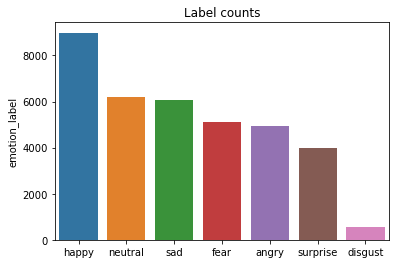

In [16]:
sns.barplot(x = df.emotion_label.value_counts().index, y = df.emotion_label.value_counts())
plt.title('Label counts')
plt.show()

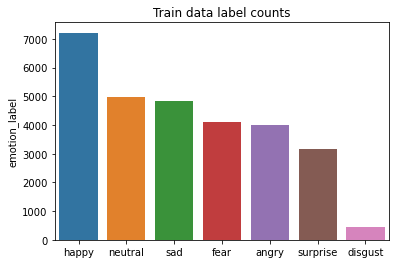

In [17]:
sns.barplot(x = df[df['usage']=='train'].emotion_label.value_counts().index, y = df[df['usage']=='train'].emotion_label.value_counts())
plt.title('Train data label counts')
plt.show()

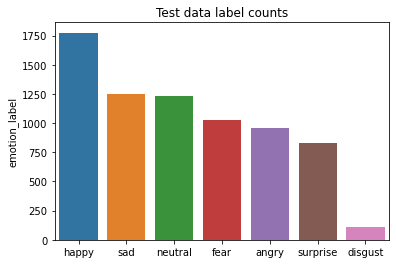

In [18]:
sns.barplot(x = df[df['usage']=='test'].emotion_label.value_counts().index, y = df[df['usage']=='test'].emotion_label.value_counts())
plt.title('Test data label counts')
plt.show()

## Drop disgust

In [19]:
df = df[df['emotion_label']!='disgust']
df.shape

(35328, 6)

In [20]:
print(df[df['usage']=='train'].shape)
print(df[df['usage']=='test'].shape)

(28262, 6)
(7066, 6)


## Show pictures for each emotion

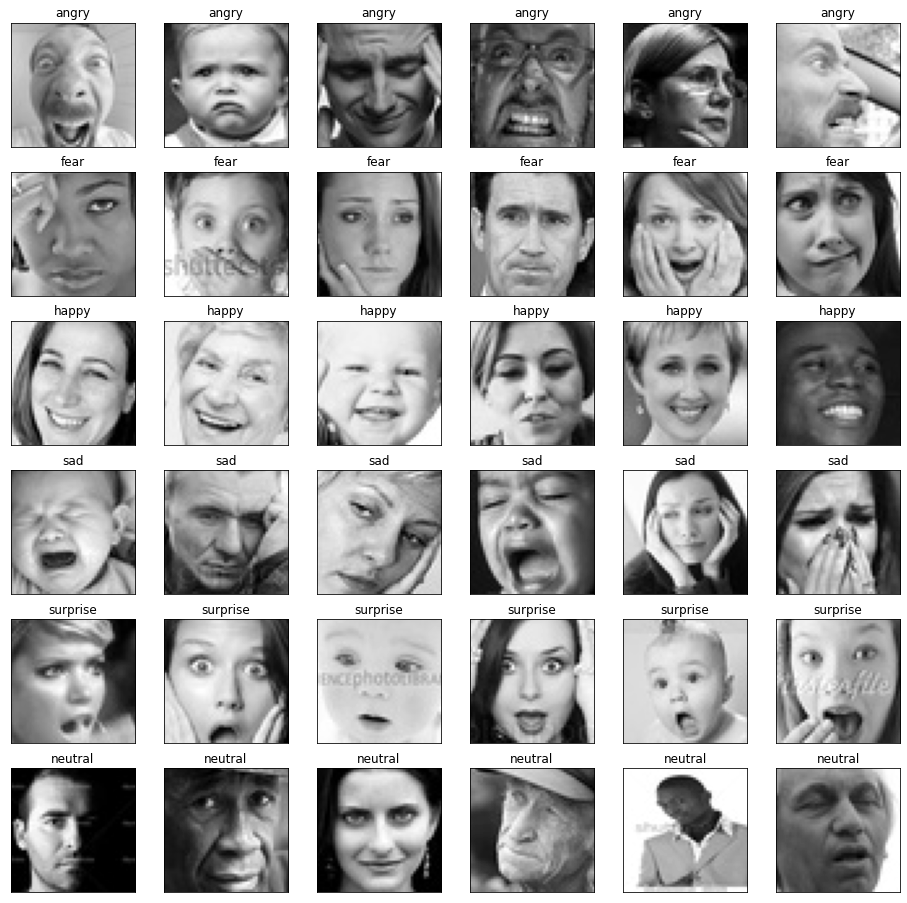

In [21]:
plt.figure(figsize=(16,16))
k = 0
for emo_num in sorted(df.emotion.unique()):
    for j in range(6):
        img = df[df.emotion==emo_num].iloc[k].pixels
        img = np.array(img.split(' ')).reshape(48, 48).astype('int')

        k += 1
        plt.subplot(6,6,k)
        plt.imshow(img, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(emotion_labels[emo_num])
plt.show()

# Export data

In [22]:
csv_file = '../data/fer_data.csv'
df.to_csv(csv_file, index=False)

## Load data example

In [ ]:
df = pd.read_csv(csv_file)

In [ ]:
def load_data(df):
    image_pixels = []
    image_scaled = []
    image_labels = list(df.emotion)
    
    for index, row in df.iterrows():
        image = np.fromstring(row.pixels, dtype=int, sep=' ')
        scale = np.fromstring(row.scaled_pixels, dtype=int, sep=' ')
        #image = np.reshape(image, (48, 48))
        image_pixels.append(image)
        image_scaled.append(scale)
        
    return image_pixels, image_scaled, image_labels

In [ ]:
X, X_scale, y = load_data(df[df['usage']=='train'])

In [ ]:
len(X)

In [ ]:
len(y)

In [ ]:
X[0]